In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

from fractions import Fraction

## Approximating Irrational Power

We want to calculate the value of $10^{\sqrt{2}}$. As $\sqrt{2}$ is irrational, we can approximate it by approximating $\sqrt{2}$ as $\sqrt{2} = 1.4142$ and so on. So $10^{\sqrt{2}} = 10^{1.4141} = 10^1\times10^{4/10}\times10^{1/100}\dots$. To do this what we'll do is we'll take the successive square roots of 10 and multiply them together.

In [3]:
#Making the power list
power = [2**x for x in range(0, 20)]

In [4]:
# ten_to_power = []
# for n in power:
#     ten_to_power.append(10**(1/n))
# ten_power_minus_1 = [(x-1)/x for x in ten_to_power]

In [5]:
pd.set_option("display.precision", 10)
df = pd.DataFrame(data=[power], index=['power']).transpose()

In [6]:

df['10^x'] = df['power'].apply(lambda x: 10**(1/x))

In [7]:
df['(10^x-1)/x'] = df['power'].apply(lambda x: (10**(1/x)-1)*x)

In [8]:
df

,power,10^x,(10^x-1)/x
0,1,10.0000000000,9.0000000000
1,2,3.1622776602,4.3245553203
2,4,1.7782794100,3.1131176402
3,8,1.3335214322,2.6681714573
4,16,1.1547819847,2.4765117550
5,32,1.0746078283,2.3874505063
6,64,1.0366329284,2.3445074200
7,128,1.0181517217,2.3234203799
8,256,1.0090350448,2.3129714794
9,512,1.0045073643,2.3077704983


It seems that for small number $x$ we have 
$$\frac{10^x-1}{x} = 2.3026$$ 
Which gives
$$10^x = 1+2.3026x$$

Now, if we use the power of e, we'll get:
$$ 10^x = e^{x\times\ln{10}} = e^{2.3026x}$$
So using y = 2.3026x, we get:
$$e^y = 1+y$$ 
For small y

In [9]:
df['x'] = df['power'].apply(lambda x: Fraction(1,x))

In [10]:
#Final DF
df

,power,10^x,(10^x-1)/x,x
0,1,10.0000000000,9.0000000000,1
1,2,3.1622776602,4.3245553203,1/2
2,4,1.7782794100,3.1131176402,1/4
3,8,1.3335214322,2.6681714573,1/8
4,16,1.1547819847,2.4765117550,1/16
5,32,1.0746078283,2.3874505063,1/32
6,64,1.0366329284,2.3445074200,1/64
7,128,1.0181517217,2.3234203799,1/128
8,256,1.0090350448,2.3129714794,1/256
9,512,1.0045073643,2.3077704983,1/512


In [11]:
# df.to_csv('real.csv', index=False)

### For Complex Numbers

In [12]:

    # np.complex(1,2.3025901493*x)

In [13]:
power_i = [f"i/{x}" for x in power]

In [14]:
df2 = pd.DataFrame(data=[power_i, power], index=['power_i', 'power']).transpose()

In [15]:
base_num = np.complex(1,2.3025901493*1/df2['power'].iloc[-1])

In [16]:
base_num

(1+4.391842173194885e-06j)

In [17]:
df2['Complex Number'] = base_num**(df2['power'].iloc[-1]/df2['power'])

In [18]:
df2

,power_i,power,Complex Number
0,i/1,1,(-0.6682086505955537+0.7439807200820104j)
1,i/2,2,(0.4073060309422769+0.9132945053144165j)
2,i/4,4,(0.838841033533413+0.5443787730956522j)
3,i/8,8,(0.9588645101370893+0.28386636867904425j)
4,i/16,16,(0.9896628572828787+0.14341569282411987j)
5,i/32,32,(0.997412445606028+0.07189387572609467j)
6,i/64,64,(0.999352941561282+0.03597021269271263j)
7,i/128,128,(0.9998382420585472+0.017988016050803517j)
8,i/256,256,(0.9999595695728482+0.008994371671690407j)
9,i/512,512,(0.9999898972799399+0.004497231270113771j)


In [19]:
base_num**2

(0.9999999999807118+8.78368434638977e-06j)

In [20]:
df2

,power_i,power,Complex Number
0,i/1,1,(-0.6682086505955537+0.7439807200820104j)
1,i/2,2,(0.4073060309422769+0.9132945053144165j)
2,i/4,4,(0.838841033533413+0.5443787730956522j)
3,i/8,8,(0.9588645101370893+0.28386636867904425j)
4,i/16,16,(0.9896628572828787+0.14341569282411987j)
5,i/32,32,(0.997412445606028+0.07189387572609467j)
6,i/64,64,(0.999352941561282+0.03597021269271263j)
7,i/128,128,(0.9998382420585472+0.017988016050803517j)
8,i/256,256,(0.9999595695728482+0.008994371671690407j)
9,i/512,512,(0.9999898972799399+0.004497231270113771j)


In [21]:
i_8 = df2.iloc[3]['Complex Number']

In [22]:
power_8 = np.arange(1,41)

In [23]:
df3 = pd.DataFrame(data=[power_8], index=['Power']).transpose()

In [24]:
df3['Complex Number'] = df3['Power'].apply(lambda x: i_8**x)

In [51]:
i_8

(0.9588645101370893+0.28386636867904425j)

In [25]:
df3

,Power,Complex Number
0,1,0.9588645101+0.2838663687j
1,2,0.8388410335+0.5443787731j
2,3,0.6498040712+0.7601042437j
3,4,0.4073060309+0.9132945053j
4,5,0.1312977031+0.9913461724j
5,6,-0.1555131303+0.9878376642j
6,7,-0.4295299121+0.9030575304j
7,8,-0.6682086506+0.7439807201j
8,9,-0.8519126658+0.5236947455j
9,10,-0.9655281467+0.2603229508j


In [26]:
# df3.drop('Complex Number', axis = 1).to_csv('complex.csv', index=False)

In [27]:
df3['Real Part'] = df3['Complex Number'].apply(lambda x: x.real)
df3['Imaginary Part'] = df3['Complex Number'].apply(lambda x: x.imag)

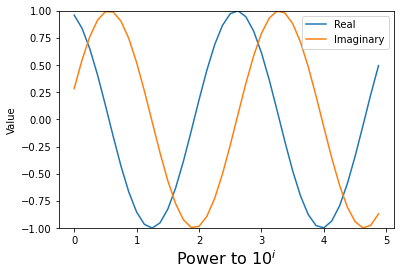

In [28]:
t = np.arange(len(df3))
plt.plot(t/8, df3['Real Part'], label='Real')
plt.plot(t/8, df3['Imaginary Part'], label='Imaginary')
plt.ylim([-1,1])
plt.xlabel('Power to $10^{i}$', fontsize=16)
plt.ylabel('Value')
plt.legend()

(0.0, 5.0)

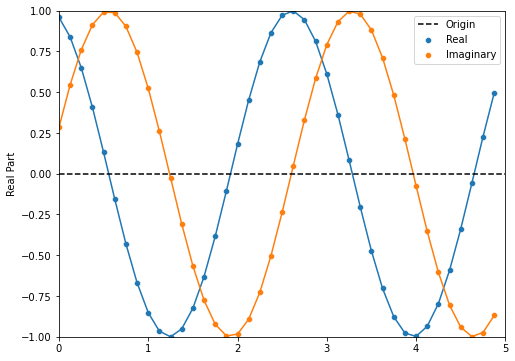

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=t/8, y='Real Part', data=df3, label='Real')
sns.scatterplot(x=t/8, y='Imaginary Part', data=df3, label='Imaginary')
sns.lineplot(x=t/8, y='Real Part', data=df3)
sns.lineplot(x=t/8, y='Imaginary Part', data=df3)
plt.plot(t, 0*t, '--', color='black', label='Origin')
# sns.scatterplot(x=3.14*t/8, y=np.sin(t), label='Sin')
plt.legend()
plt.ylim([-1,1])
plt.xlim([0,40/8])
# plt.axis.Axis.set_visible()

### Using base e

In base e, we assume that:
$$ e^{ix} = 1+ix $$
For small $x$

In [30]:
#Assume x = 1/2048 which is suffieciently small
y = 1/(2**11)
base_num = np.complex(1,y)

In [31]:
y

0.00048828125

In [32]:
power = np.arange(0,20)
cp = pd.DataFrame(data=[power], index=['power']).transpose()

In [33]:
cp['x'] = cp['power'].apply(lambda x: y*2**x)
#  = cp['power'].apply(lambda x: base_num**x)

In [34]:
# cp

In [35]:
base_num

(1+0.00048828125j)

In [36]:
cp['e^x'] = base_num**(2**(cp['power']))

In [37]:
cp

,power,x,e^x
0,0,0.0004882812,1.0000000000+0.0004882812j
1,1,0.0009765625,0.9999997616+0.0009765625j
2,2,0.0019531250,0.9999985695+0.0019531245j
3,3,0.0039062500,0.9999933243+0.0039062435j
4,4,0.0078125000,0.9999713899+0.0078124348j
5,5,0.0156250000,0.9998817464+0.0156244226j
6,6,0.0312500000,0.9995193843+0.0312451499j
7,7,0.0625000000,0.9980627401+0.0624602659j
8,8,0.1250000000,0.9922279484+0.1246785284j
9,9,0.2500000000,0.9689715661+0.2474190408j


In [38]:
cp['e^x'].values.real

array([ 1.        ,  0.99999976,  0.99999857,  0.99999332,  0.99997139,
        0.99988175,  0.99951938,  0.99806274,  0.99222795,  0.96897157,
        0.87768971,  0.5404343 , -0.41634994, -0.6542825 , -0.14578386,
       -0.96140802,  0.84076767,  0.39803284, -0.71488313, -0.04237868])

In [39]:
np.cos(cp['x'].values)

array([ 0.99999988,  0.99999952,  0.99999809,  0.99999237,  0.99996948,
        0.99987793,  0.99951176,  0.99804751,  0.99219767,  0.96891242,
        0.87758256,  0.54030231, -0.41614684, -0.65364362, -0.14550003,
       -0.95765948,  0.83422336,  0.39185723, -0.69289582, -0.03979076])

### Base 8

In [40]:
base_num = cp.iloc[8]['e^x']

In [41]:
base_num, i_8

((0.992227948396147+0.12467852835684956j),
 (0.9588645101370893+0.28386636867904425j))

In [42]:
power = np.arange(0,50)
cp2 = pd.DataFrame(data=[power], index=['power']).transpose()
# cp2['x'] = cp2['power'].apply(lambda x: y*2**x)
cp2['e^x'] = base_num**power

In [43]:
cp2

,power,e^x
0,0,1.0000000000+0.0000000000j
1,1,0.9922279484+0.1246785284j
2,2,0.9689715661+0.2474190408j
3,3,0.9305928272+0.3663060361j
4,4,0.8776897142+0.4794840309j
5,5,0.8110869012+0.5851865182j
6,6,0.7318228980+0.6817635396j
7,7,0.6411338579+0.7677074401j
8,8,0.5404342986+0.8416764042j
9,9,0.4312950399+0.9025154047j


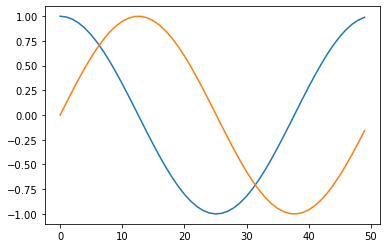

In [44]:
plt.plot(power, cp2['e^x'].values.real, label='Real')
plt.plot(power, cp2['e^x'].values.imag, label='Imaginary')

In [45]:
complexn = cp[0:20]

In [46]:
complexn['Real^2+Imaginary^2'] = complexn['e^x'].apply(lambda x: x.real**2 + x.imag**2)

<ipython-input-46-177b6a04fc83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexn['Real^2+Imaginary^2'] = complexn['e^x'].apply(lambda x: x.real**2 + x.imag**2)


In [47]:
complexn

,power,x,e^x,Real^2+Imaginary^2
0,0,0.0004882812,1.0000000000+0.0004882812j,1.0000002384
1,1,0.0009765625,0.9999997616+0.0009765625j,1.0000004768
2,2,0.0019531250,0.9999985695+0.0019531245j,1.0000009537
3,3,0.0039062500,0.9999933243+0.0039062435j,1.0000019074
4,4,0.0078125000,0.9999713899+0.0078124348j,1.0000038147
5,5,0.0156250000,0.9998817464+0.0156244226j,1.0000076294
6,6,0.0312500000,0.9995193843+0.0312451499j,1.0000152589
7,7,0.0625000000,0.9980627401+0.0624602659j,1.0000305180
8,8,0.1250000000,0.9922279484+0.1246785284j,1.0000610370
9,9,0.2500000000,0.9689715661+0.2474190408j,1.0001220777


In [48]:
base_num = complexn.iloc[0]['e^x']
power = np.arange(0,50)
cp2 = pd.DataFrame(data=[power], index=['power']).transpose()
# cp2['x'] = cp2['power'].apply(lambda x: y*2**x)
cp2['e^x'] = base_num**power